In [1]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/harsh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation:
    Parameters
    ------------
    X:(numpy-array), shape = [n_samples, n_features]
    gamma:(float) Tuning parameter of the RBF kernel
    n_components(int) number of principal components to return
    
    Returns
    -----------
    X_pc: (numpy array), shape = [n_samples, k_features] Projected dataset
    lambdas: (list) eigenvalues
    """
    # Calculate pairwise squared Euclidean distances in the MxN dimensional dataset
    sq_dists = pdist(X, 'sqeuclidean')
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    # compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    # center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # obtain the eigenpairs from the centered kernel matrix
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    # (scipy.linalg.eigh returns the eigenpairs in ascending order)

    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    # collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

/tmp/ipykernel_17047/3398319153.py:32: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  alphas = np.column_stack((eigvecs[:, i] for i in range(n_components)))


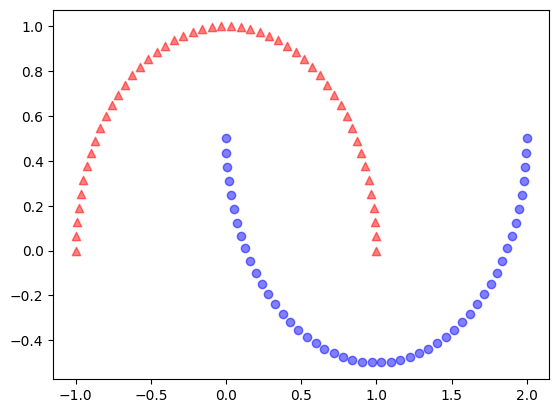

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)

In [8]:
# now the new datapoint
x_new = X[25]
x_proj = alphas[25]
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma*pair_dist)
    return k.dot(alphas / lambdas)

x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
print(x_proj, x_reproj)

[0.07877284] [0.07877284]


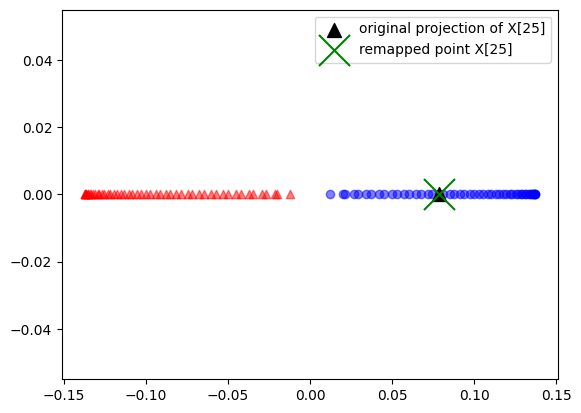

In [9]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='original projection of X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)